<a href="https://colab.research.google.com/github/SwagAbyss/SwagML/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data using Pandas

column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
raw_data = pd.read_csv('./car_evaluation.csv', names=column_names)

In [3]:
# Top 5 rows

raw_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Shape of the dataset(row, column)

raw_data.shape

(1728, 7)

In [5]:
# Information about the data

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Copying the raw data to do some exploration

data = raw_data.copy(deep=True)

In [7]:
# Find missing values

data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
# Find duplicated values

data.duplicated().sum()

0

<AxesSubplot: >

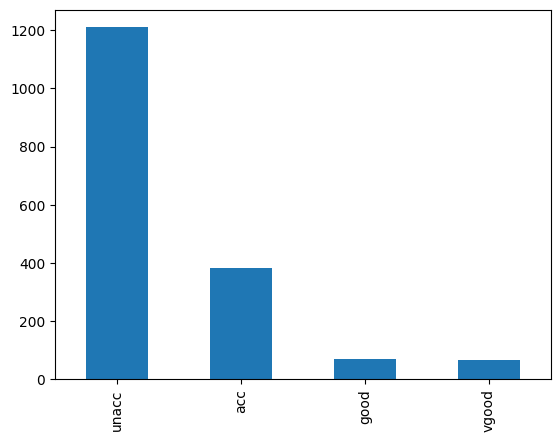

In [9]:
# Distribution of Target Variable
data['class'].value_counts().plot(kind='bar')

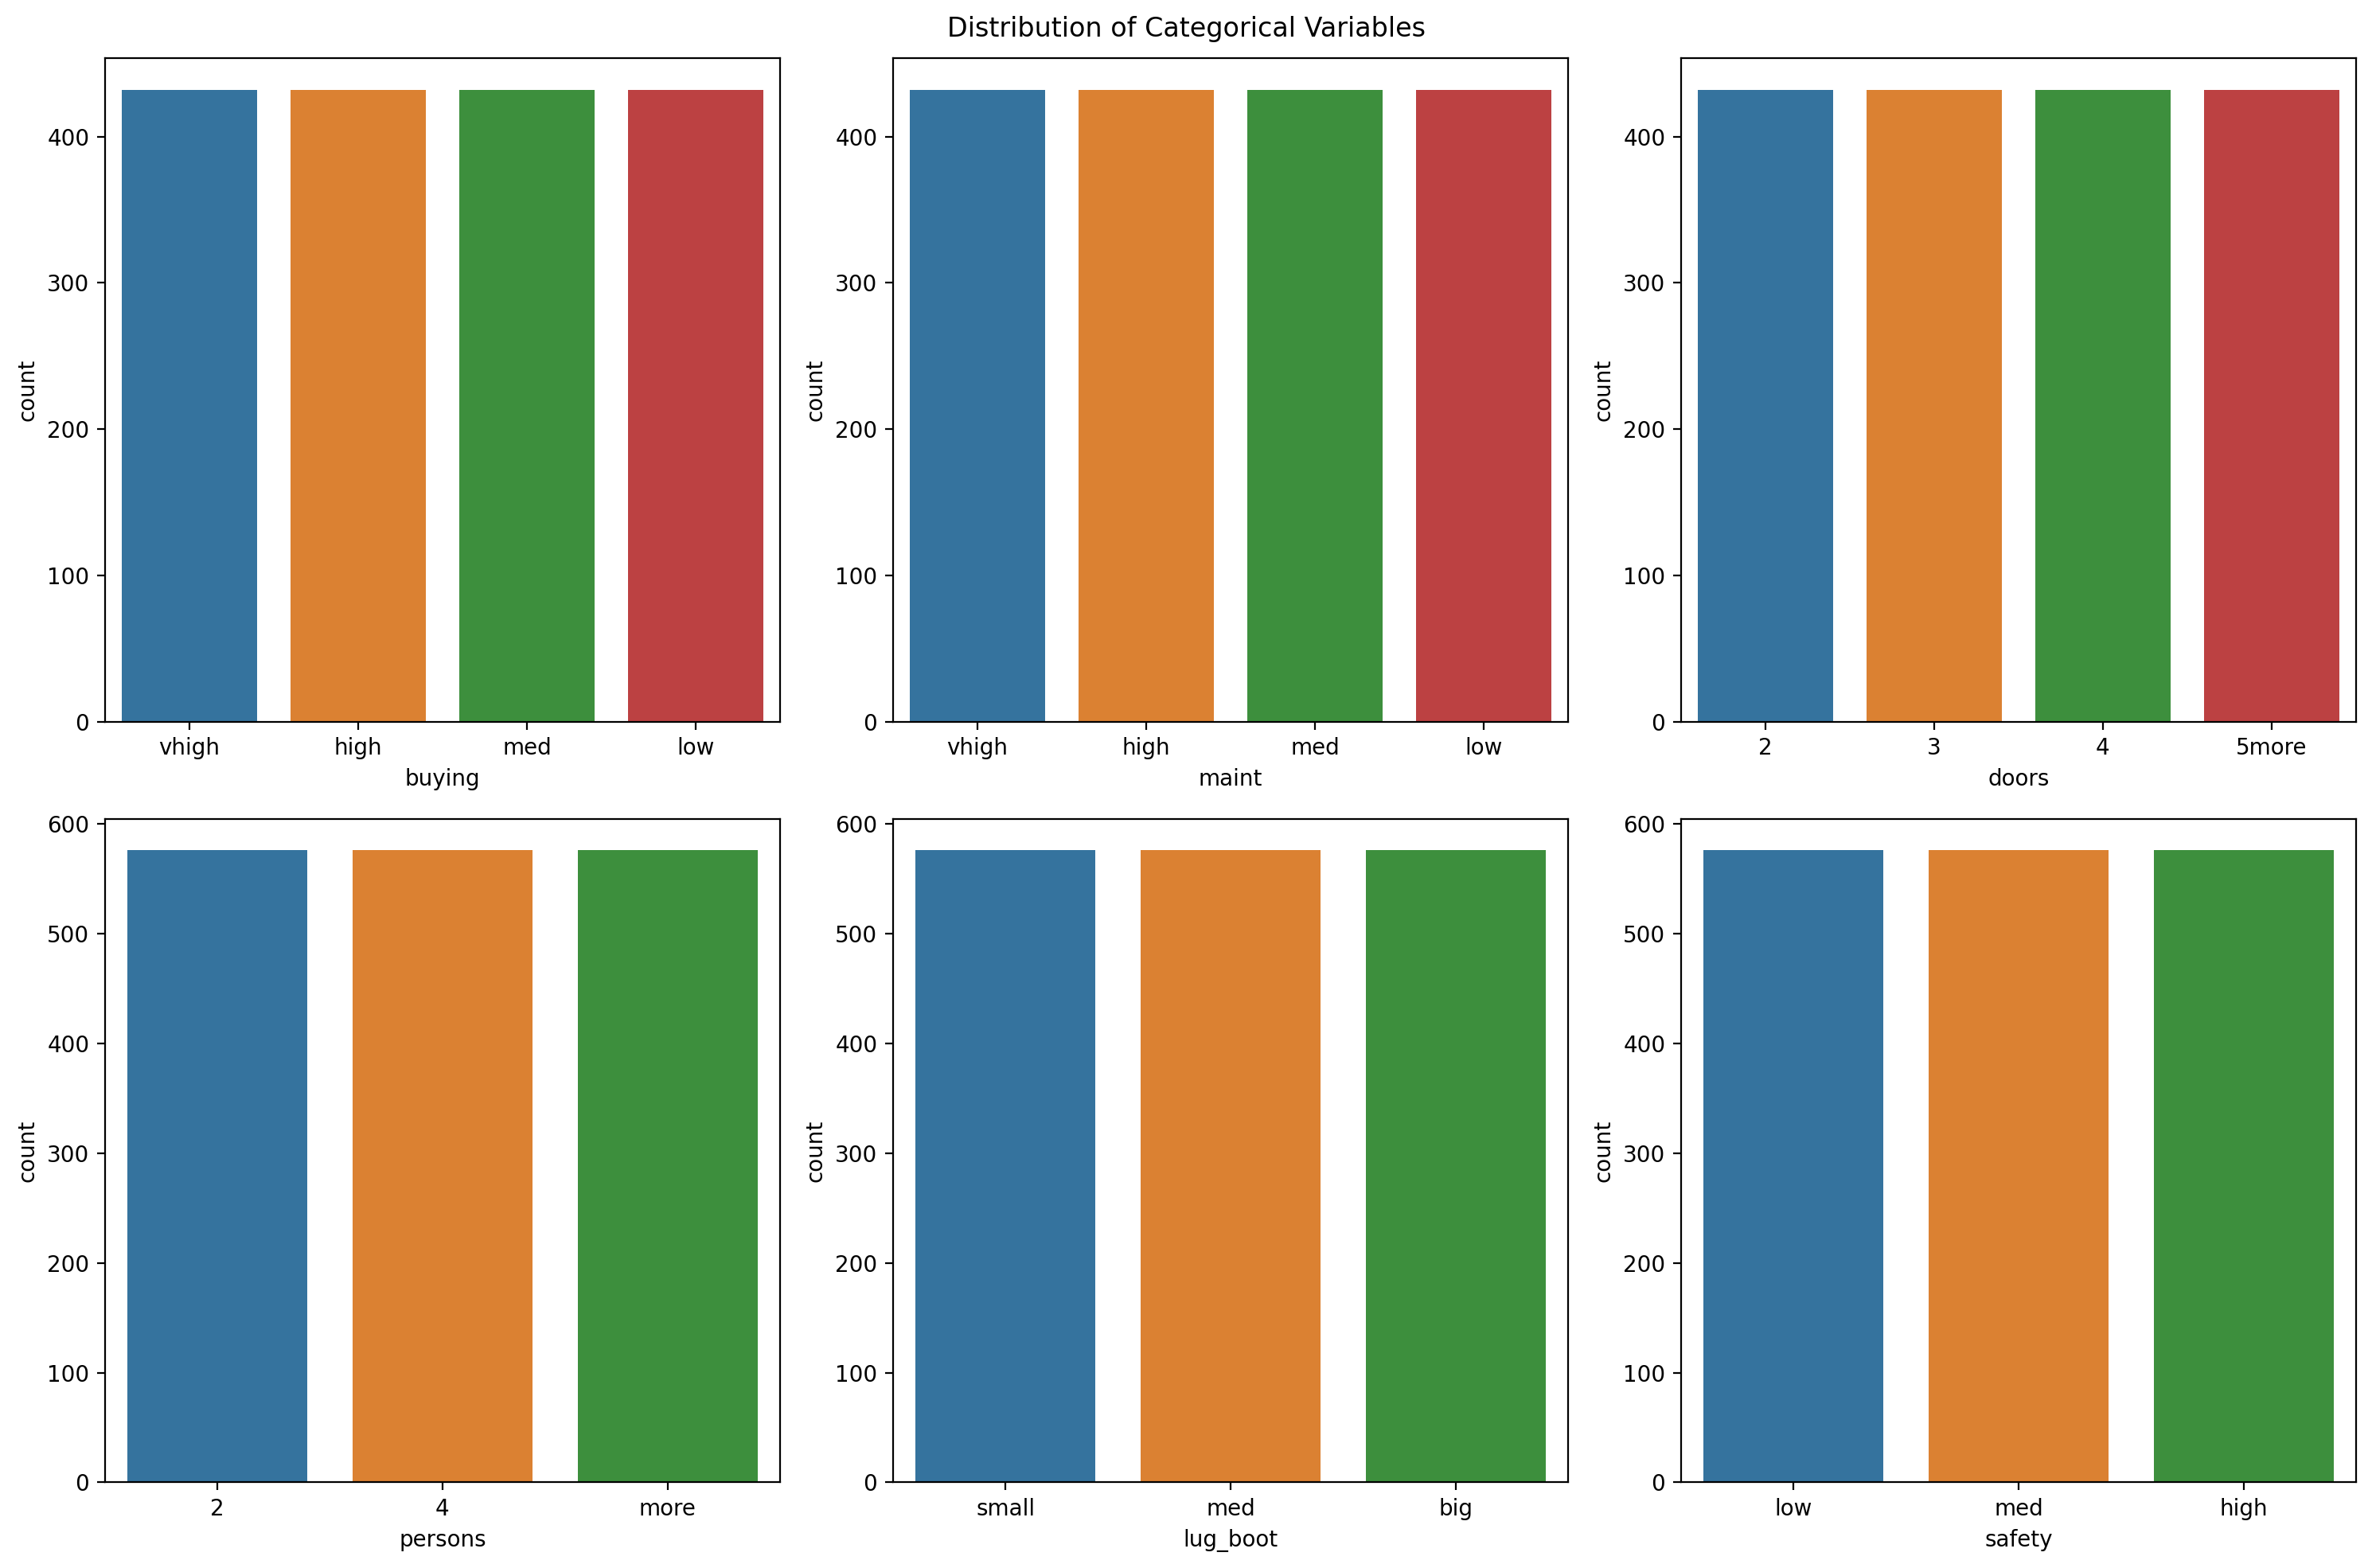

In [10]:
# Distribution of Categorical Variables

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), dpi=200)
axes = axes.flat
features = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

for index, column in enumerate(data[features].columns):
    graph = sns.countplot(
        data=data, 
        x=column, 
        saturation=0.7,
        ax=axes[index]
)

plt.suptitle('Distribution of Categorical Variables', fontsize=12)
plt.tight_layout()

- __There are no numerical variables present in this dataset. Because of that we can't find any outliers in this dataset.__
- __Every columns are  categorical variables data.__
- __There is no missing values present in this dataset.__
- __There is no duplicated values.__
- __Feature variables are evenly distributed.__

In [11]:
# Encoding the features data

from sklearn.preprocessing import OrdinalEncoder
encoder1 = OrdinalEncoder()
data[features] = encoder1.fit_transform(data[features].values)

In [12]:
# Encoding the target data

from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
data['class'] = encoder2.fit_transform(data['class'])

Text(0.5, 1.0, "Relationship between safety of a car and it's buying price")

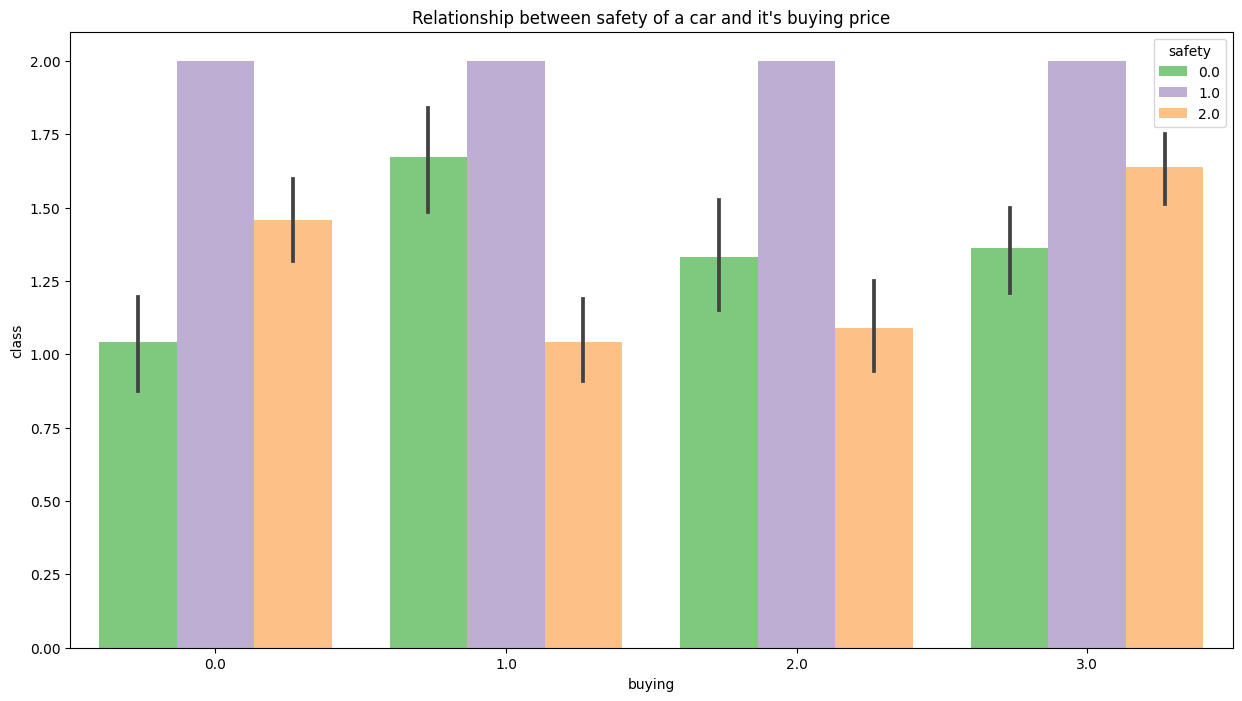

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(
    data=data, 
    x='buying', 
    y='class', 
    hue='safety',
    saturation=2,
    palette='Accent')
plt.title("Relationship between safety of a car and it's buying price", size=12)

In [14]:
# Splitting the data into features and target

X = data.drop('class', axis=1)
y = data['class']

In [15]:
# Splitting the data into training data and testing data

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=True)

In [16]:
print('xtrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytrain shape: ', ytrain.shape)
print('ytest shape: ',ytest.shape)

xtrain shape:  (1209, 6)
xtest shape:  (519, 6)
ytrain shape:  (1209,)
ytest shape:  (519,)


In [17]:
# building the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def select_model_predict(model):
    
    # Training the model
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    #Checking Bias-variance tradeoff
    train_accuracy = model.score(xtrain, ytrain)
    test_accuracy = model.score(xtest, ytest)
    
    #Converting Accuracy score into dataframe
    dataframe = pd.DataFrame(
        [train_accuracy*100, test_accuracy*100], 
        index=['Train Accuracy', 'Test Accuracy'], 
        columns=['Value'])
    print(model)
    print(dataframe)
    print('\n')
    # Classification Report for the model
    report = classification_report(ytest, ypred)
    print(report)
    
    return model

In [19]:
knc = select_model_predict(KNeighborsClassifier(n_neighbors=7))

KNeighborsClassifier(n_neighbors=7)
                    Value
Train Accuracy  96.608768
Test Accuracy   92.100193


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       111
           1       0.86      0.55      0.67        22
           2       0.94      0.99      0.96       368
           3       1.00      0.78      0.88        18

    accuracy                           0.92       519
   macro avg       0.91      0.78      0.83       519
weighted avg       0.92      0.92      0.92       519



In [ ]:
# Creating object for the class
knc = KNeighborsClassifier(n_neighbors=7)

# Training the model
knc.fit(xtrain, ytrain)

# Predicting the model
ypred = knc.predict(xtest)

# Comparing the values
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.tail()

,Actual,Predicted
514,2,2
515,2,2
516,2,2
517,2,2
518,0,0


In [50]:
from sklearn.model_selection import GridSearchCV

# Setting the parameters for tuning the algorithm
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(np.arange(15)),
    'min_samples_leaf' : list(np.arange(5))
}

# Create a grid search object
grid = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=1)

# Fit the grid search to the data
grid.fit(xtrain, ytrain)


# Print the best parameters and score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters:  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1}
Best Score:  0.9710503755015261


In [57]:
dtc = select_model_predict(DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, splitter='best'))

DecisionTreeClassifier(criterion='entropy', max_depth=12)
                    Value
Train Accuracy  99.917287
Test Accuracy   96.917148


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       111
           1       0.86      0.86      0.86        22
           2       0.99      0.98      0.99       368
           3       1.00      1.00      1.00        18

    accuracy                           0.97       519
   macro avg       0.94      0.95      0.95       519
weighted avg       0.97      0.97      0.97       519



In [60]:
# Creating object for the class
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, splitter='best')

# Training the model
dtc.fit(xtrain, ytrain)

# Predicting the model
ypred = dtc.predict(xtest)

# Comparing the values
df_compare = pd.DataFrame({'Actual':ytest, 'Predicted':ypred}).reset_index(drop=True)
df_compare.head()

,Actual,Predicted
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
